#Content
1) Introduction
2) Load packages
3)  Read the data
4)  Check the data
5)  Glimpse the data
6)  Check missing data
7)  Check data unbalance
8)  Data exploration
9)  Predictive models
10) RandomForrestClassifier
11) AdaBoostClassifier
12) CatBoostClassifier
13) XGBoost
14) LightGBM
15) Conclusions
16) References

#Import laibray and unzip file

In [5]:
from google.colab import files

# Upload a file
uploaded = files.upload()

# Access the uploaded file
for filename in uploaded.keys():
    print('Uploaded file:', filename)

KeyboardInterrupt: ignored

In [29]:
# Read the extracted files
import numpy as np
import pandas as pd
import matplotlib as plt
import warnings
import seaborn as sns
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


import gc
from datetime import datetime 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
#from catboost import CatBoostClassifier
from sklearn import svm
import lightgbm as lgb
from lightgbm import LGBMClassifier
import xgboost as xgb
# Disable DeprecationWarning
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Your code here

# Enable DeprecationWarning again
warnings.filterwarnings("default", category=DeprecationWarning)

import zipfile
zip_file_path = '/content/archive (5).zip'
# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/target_directory/')

#with tarfile.open("/content/archive (5) (1).zip", "r:gz") as gzip_file:
 #   gzip_file.extractall()

#Read Tha Data

In [30]:
data_df = pd.read_csv("/content/target_directory/creditcard.csv")
data_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


#Check the data 

In [31]:
print("Credit Card Fraud Detection data -  rows:",data_df.shape[0]," columns:", data_df.shape[1])

Credit Card Fraud Detection data -  rows: 284807  columns: 31


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



#Glimpse the data

In [32]:
data_df.head() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#Check missing data 

In [33]:
data_df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
class     0
dtype: int64

#Check data unbalance

To check data imbalance in Python, you can use the value_counts() function to count the number of occurrences of each class in a pandas dataframe. For example:

In [34]:

# Count the number of occurrences of each class
class_counts = data_df['class'].value_counts()
#class_counts

# Print the class counts
print(class_counts)

0    284315
1       492
Name: class, dtype: int64


In [35]:
#temp = data_df["class"].value_counts()
#df = pd.DataFrame({'class': temp.index,'values': temp.values})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



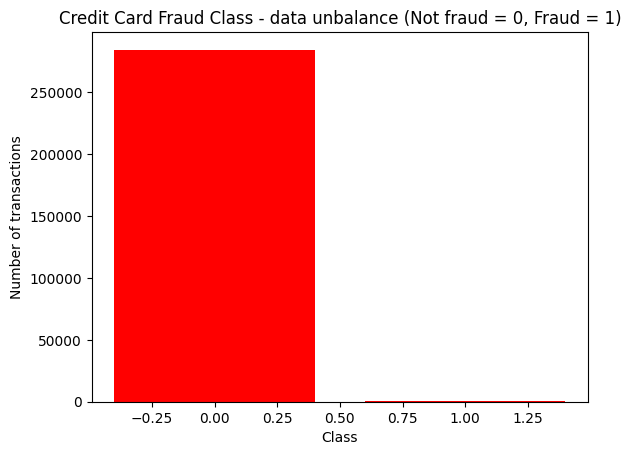

In [36]:
import matplotlib.pyplot as plt

class_count = data_df['class'].value_counts()
plt.bar(class_count.index, class_count.values, color='red')
plt.title('Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)')
plt.xlabel('Class')
plt.ylabel('Number of transactions')
plt.show()


#Data exploration

In [37]:
"""
class_0 = data_df.loc[data_df['class'] == 0]["Time"]
class_1 = data_df.loc[data_df['class'] == 1]["Time"]

hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']
"""

'\nclass_0 = data_df.loc[data_df[\'class\'] == 0]["Time"]\nclass_1 = data_df.loc[data_df[\'class\'] == 1]["Time"]\n\nhist_data = [class_0, class_1]\ngroup_labels = [\'Not Fraud\', \'Fraud\']\n'

In [38]:
#class_0

In [39]:
#class_1

In [40]:
#print(hist_data)

In [41]:
#print(group_labels)

In [42]:
# import necessary libraries
import plotly.figure_factory as ff
from plotly.offline import iplot

# create separate data frames for fraud and non-fraud transactions
class_0 = data_df.loc[data_df['class'] == 0]["Time"]
class_1 = data_df.loc[data_df['class'] == 1]["Time"]

# create histogram data and labels
hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

# create density plot
fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)

# update plot layout and display
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')


In [43]:
data_df['Hour'] = data_df['Time'].apply(lambda x: np.floor(x / 3600))
print("Hour",data_df['Hour'])
tmp = data_df.groupby(['Hour', 'class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
df = pd.DataFrame(tmp)
#df.columns = ['Hour', 'class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']
df.head()

Hour 0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
284802    47.0
284803    47.0
284804    47.0
284805    47.0
284806    47.0
Name: Hour, Length: 284807, dtype: float64


,Hour,class,min,max,count,sum,mean,median,var
0,0.0,0,0.0,7712.43,3961,256572.87,64.774772,12.990,45615.821201
1,0.0,1,0.0,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0,0.0,1769.69,2215,145806.76,65.826980,22.820,20053.615770
3,1.0,1,59.0,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0,0.0,4002.88,1555,106989.39,68.803466,17.900,45355.430437


In [44]:

# create a new column "Hour" by dividing the "Time" column by 3600 and rounding down
data_df['Hour'] = (data_df['Time'] / 3600).apply(np.floor)

# group the data by the hour and class and calculate some descriptive statistics for the "Amount" column
df = data_df.groupby(['Hour', 'class'])['Amount'].agg(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
df.columns = ['Hour', 'class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']
df.head()

,Hour,class,Min,Max,Transactions,Sum,Mean,Median,Var
0,0.0,0,0.0,7712.43,3961,256572.87,64.774772,12.990,45615.821201
1,0.0,1,0.0,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0,0.0,1769.69,2215,145806.76,65.826980,22.820,20053.615770
3,1.0,1,59.0,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0,0.0,4002.88,1555,106989.39,68.803466,17.900,45355.430437


In [47]:
"""fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Sum", data=data_df.loc[data.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Sum", data=data.loc[data.Class==1], color="red")
plt.suptitle("Total Amount")
plt.show();"""
#np.array(df['Class'].tolist()) 
"""fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
sns.lineplot(ax=ax1, x="Hour", y="Sum", data=data_df.loc[df.Class==0])
sns.lineplot(ax=ax2, x="Hour", y="Sum", data=data_df.loc[df.Class==1], color="red")
fig.suptitle("Total Amount")
plt.show()"""

'fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))\nsns.lineplot(ax=ax1, x="Hour", y="Sum", data=data_df.loc[df.Class==0])\nsns.lineplot(ax=ax2, x="Hour", y="Sum", data=data_df.loc[df.Class==1], color="red")\nfig.suptitle("Total Amount")\nplt.show()'

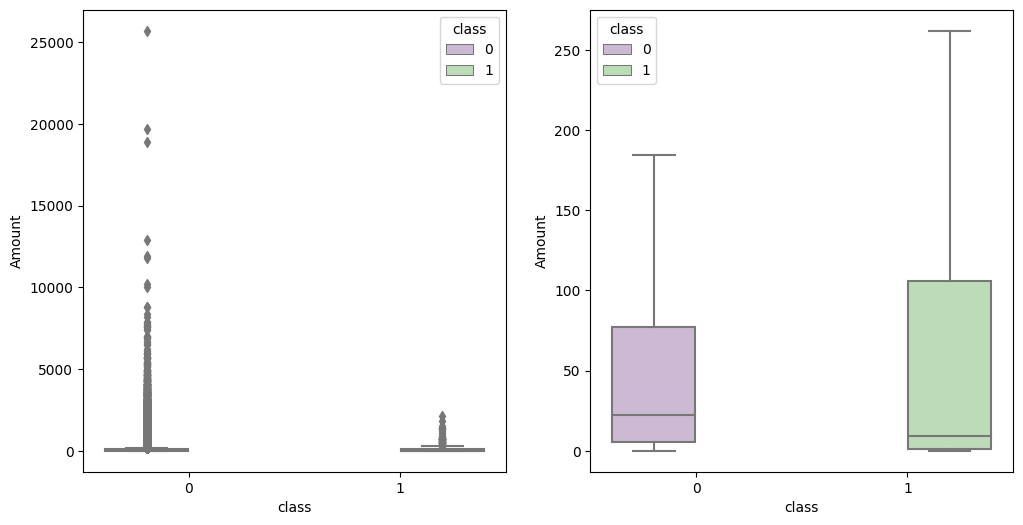

In [49]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="class", y="Amount", hue="class",data=data_df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="class", y="Amount", hue="class",data=data_df, palette="PRGn",showfliers=False)
plt.show();

In [50]:
tmp = data_df[['Amount','class']].copy()
class_0 = tmp.loc[tmp['class'] == 0]['Amount']
class_1 = tmp.loc[tmp['class'] == 1]['Amount']
class_0.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [51]:
class_1.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [53]:
fraud = data_df.loc[data_df['class'] == 1]

trace = go.Scatter(
    x = fraud['Time'],y = fraud['Amount'],
    name="Amount",
     marker=dict(
                color='rgb(238,23,11)',
                line=dict(
                    color='red',
                    width=1),
                opacity=0.5,
            ),
    text= fraud['Amount'],
    mode = "markers"
)
data = [trace]
layout = dict(title = 'Amount of fraudulent transactions',
          xaxis = dict(title = 'Time [s]', showticklabels=True), 
          yaxis = dict(title = 'Amount'),
          hovermode='closest'
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='fraud-amount')

#Features correlation

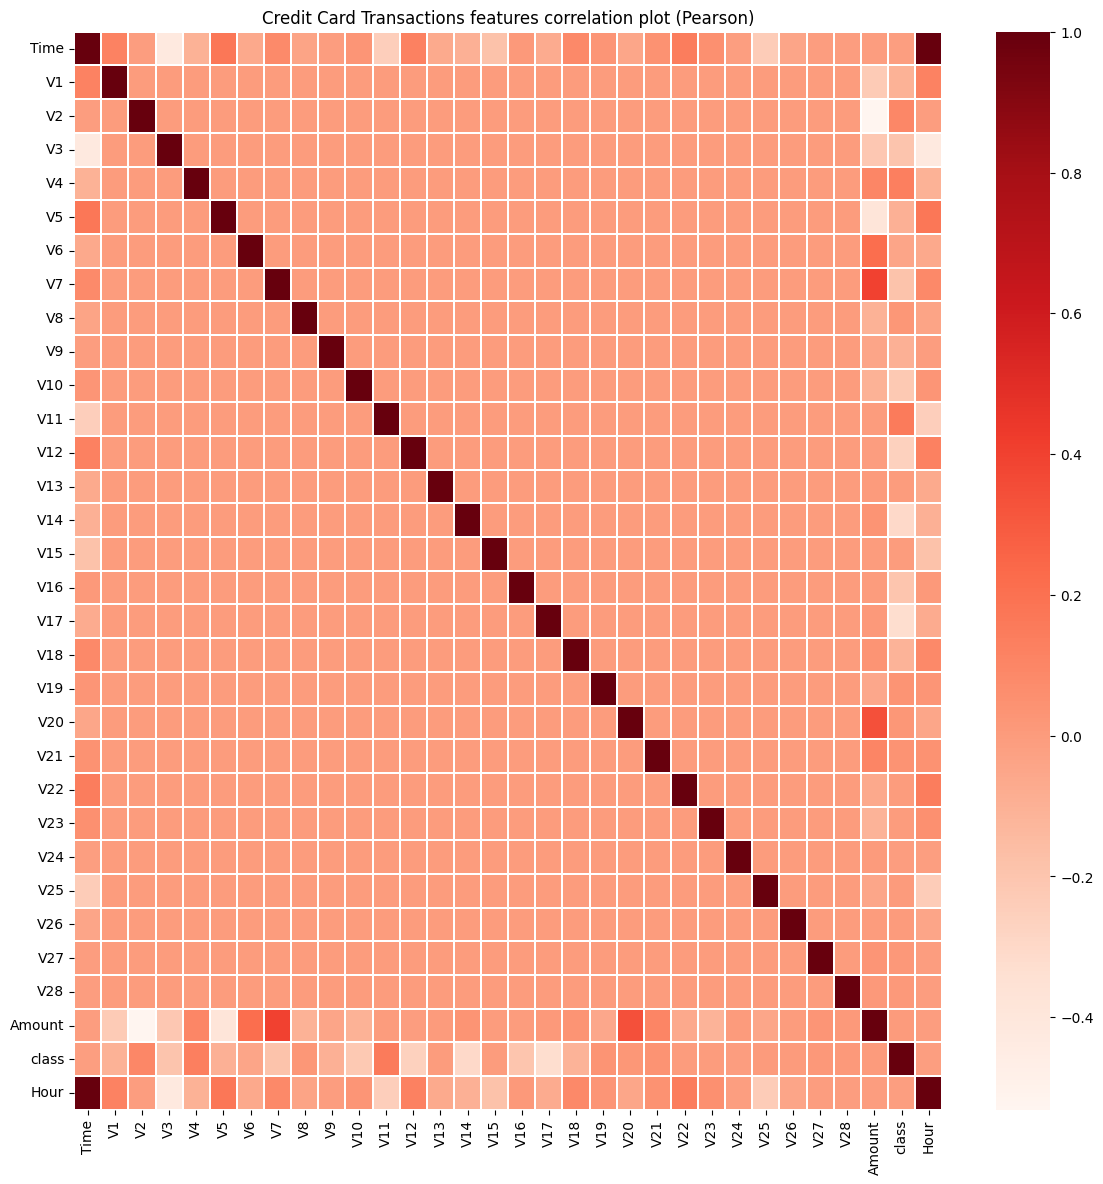

In [54]:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = data_df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

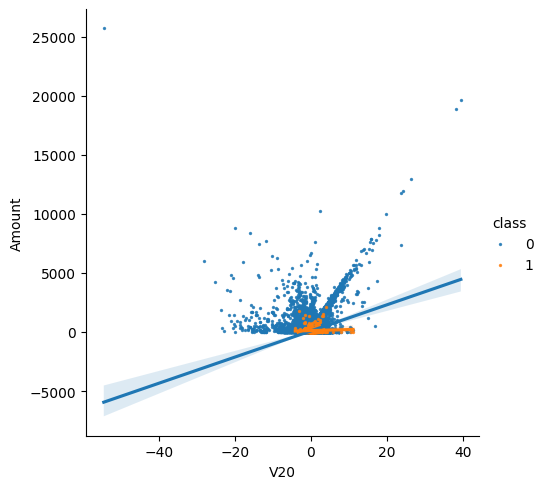

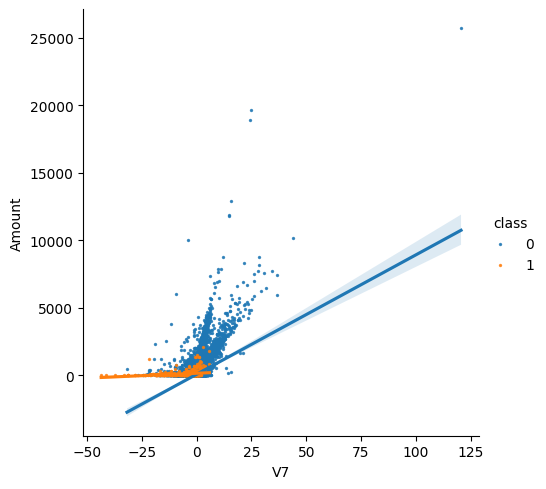

In [56]:
s = sns.lmplot(x='V20', y='Amount',data=data_df, hue='class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V7', y='Amount',data=data_df, hue='class', fit_reg=True,scatter_kws={'s':2})
plt.show()

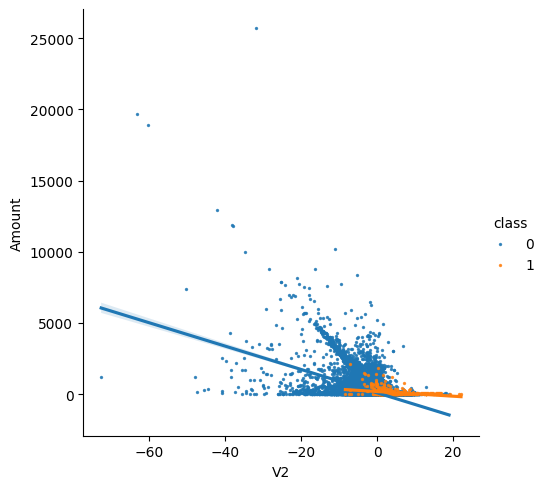

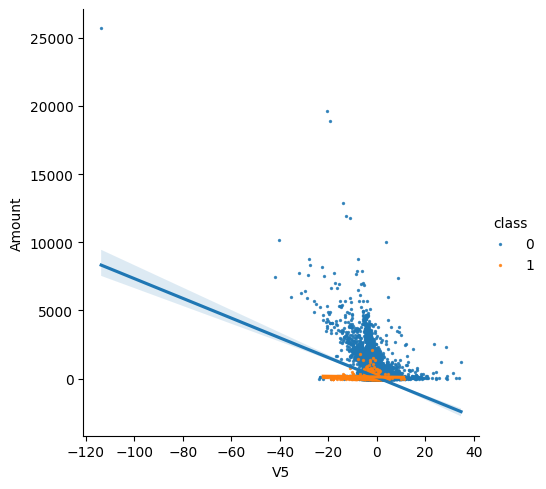

In [58]:
s = sns.lmplot(x='V2', y='Amount',data=data_df, hue='class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V5', y='Amount',data=data_df, hue='class', fit_reg=True,scatter_kws={'s':2})
plt.show()

<ipython-input-59-a730841953e9>:14: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.


<ipython-input-59-a730841953e9>:15: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.


<ipython-input-59-a730841953e9>:14: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.


<ipython-input-59-a730841953e9>:15: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameter

<Figure size 640x480 with 0 Axes>

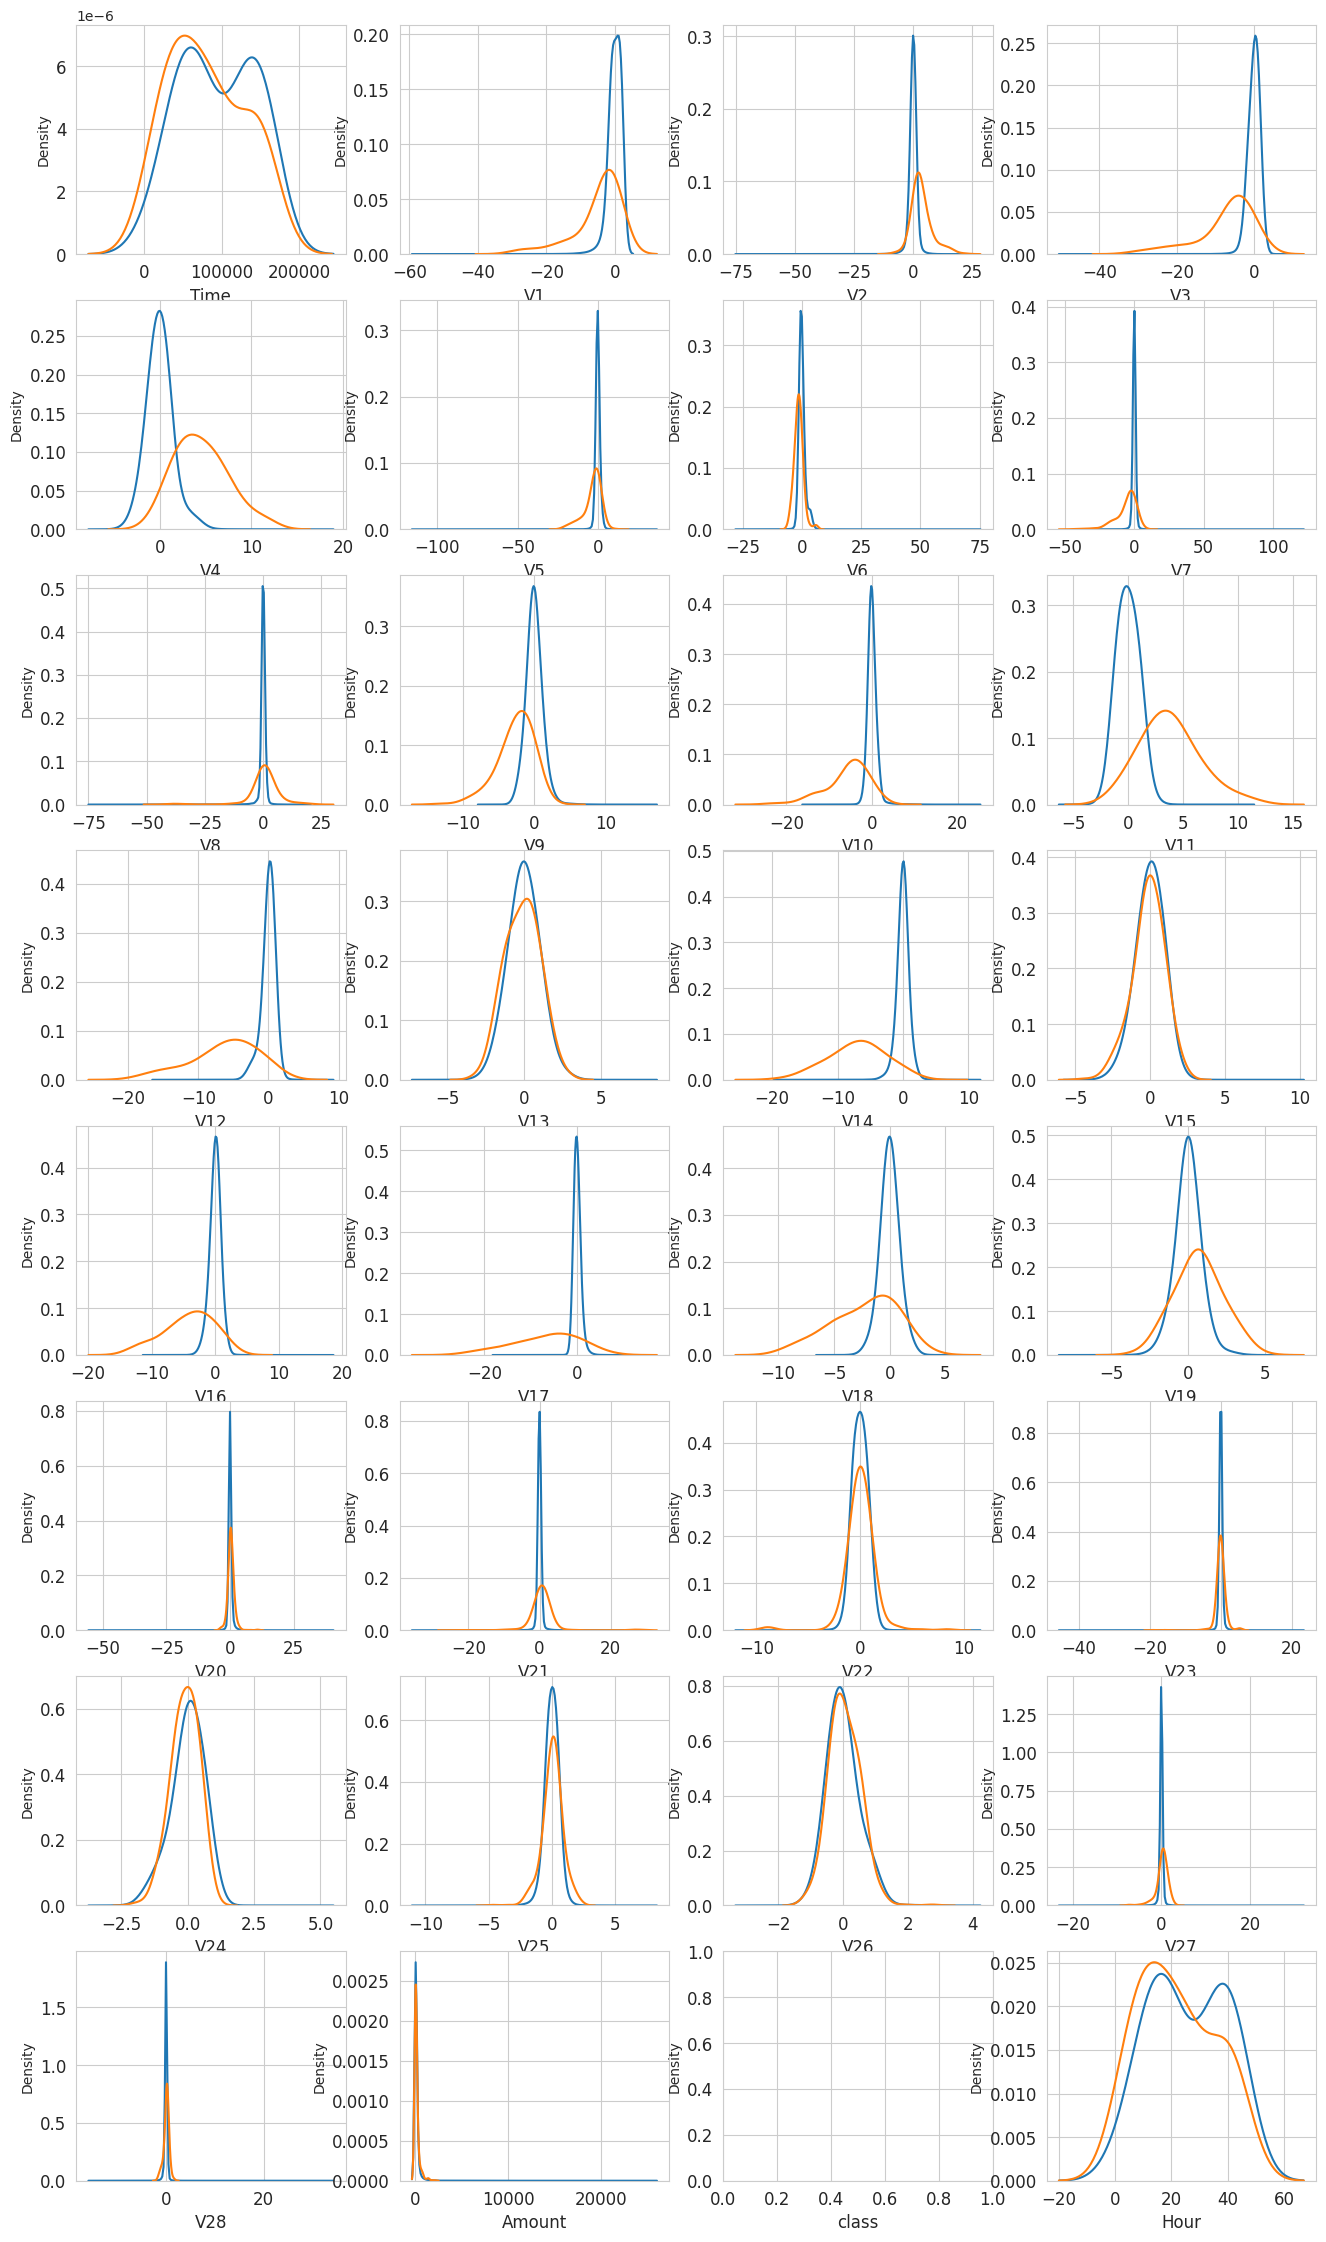

In [59]:
var = data_df.columns.values

i = 0
t0 = data_df.loc[data_df['class'] == 0]
t1 = data_df.loc[data_df['class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

#Predictive models

In [74]:
target = 'class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

#Split data in train, test and validation set

In [75]:
train_df, test_df = train_test_split(data_df, test_size=0.2, random_state=40, shuffle=True )
train_df, valid_df = train_test_split(train_df, test_size=0.2, random_state=40, shuffle=True )

#RandomForestClassifier

Define model parameters

In [76]:
clf = RandomForestClassifier(n_jobs=4, 
                             random_state=2018,
                             criterion=10,
                             n_estimators=16,
                             verbose=False)

In [77]:
clf

RandomForestClassifier(criterion=10, n_estimators=16, n_jobs=4,
                       random_state=2018, verbose=False)

In [ ]:
#clf.fit(train_df[predictors], train_df[target].values)

# Define the predictor variables and target variable
#predictors = ['Feature1', 'Feature2', 'Feature3']
#target = 'Target'

# Create an instance of the Random Forest classification model
#clf = RandomForestClassifier()

# Train the model on the training data
clf.fit(train_df.predictors, train_df['target'].values)
# Train the model on the training data
#clf.fit(train_df[predictors], train_df["target"].values)

In [ ]:
preds = clf.predict(valid_df[predictors])

In [ ]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

In [ ]:
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()